# __Analysis: Do people in countries with lower income inequality tend to have advanced digital skills?__

Importing necessary libraries

In [1]:
import pandas as pd
import sql_functions as sf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr


# 1) Getting, Cleaning and Preparing the Gini Coefficient Data

### Getting the Gini Coefficient data

In [2]:
df_gini = pd.read_csv('./Data/economic-inequality-gini-index.csv')

In [3]:
df_gini.head()

,Entity,Code,Year,Gini coefficient
0,Albania,ALB,1996,0.270103
1,Albania,ALB,2002,0.317390
2,Albania,ALB,2005,0.305957
3,Albania,ALB,2008,0.299847
4,Albania,ALB,2012,0.289605


In [4]:
print(df_gini['Year'].dtype)

#changing of datatypes not necessary in this case because we only use the year for filtering purposes

int64


### Checking available years to get the most current year for the analysis:

In [5]:
df_gini.Year.unique()

array([1996, 2002, 2005, 2008, 2012, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 1988, 1995, 2011, 2000, 1980, 1986, 1987, 1991, 1992, 1993,
       1994, 1997, 1998, 1999, 2001, 2003, 2004, 2006, 2007, 2009, 2010,
       2013, 2021, 2022, 1981, 1985, 1989, 1983, 1990, 1982, 1984, 1971,
       1973, 1975, 1977, 1979, 1970, 2023, 1978, 1968, 1969, 1972, 1974,
       1976, 1963, 1964, 1965, 1966, 1967])

In [6]:
df_gini_2021 = df_gini[df_gini['Year'] == 2021]

In [7]:
df_gini_2021.head()

,Entity,Code,Year,Gini coefficient
50,Argentina (urban),NaN,2021,0.424468
73,Armenia,ARM,2021,0.279401
112,Austria,AUT,2021,0.307022
176,Belgium,BEL,2021,0.265777
187,Benin,BEN,2021,0.343958


In [8]:
df_gini_2021.Entity.unique()

array(['Argentina (urban)', 'Armenia', 'Austria', 'Belgium', 'Benin',
       'Bolivia', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cameroon',
       'Central African Republic', 'Colombia', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Georgia', 'Greece', 'Guinea-Bissau',
       'Hungary', 'India', 'India (rural)', 'India (urban)', 'Indonesia',
       'Indonesia (rural)', 'Indonesia (urban)', 'Iran', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali', 'Moldova',
       'Montenegro', 'Netherlands', 'Niger', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Senegal',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Taiwan',
       'Thailand', 'Togo', 'Tonga', 'Tunisia', 'Turkey', 'United Kingdom',
       'United States', '

In [9]:
df_gini_2021.Entity.nunique()

73

The Gini Coefficient offers worldwide data --> we have to filter the data for EU Countries.

### Comparing data with EU-Countries list to check if all countries are present in data from the selected year 2021:

Creating a list of EU Countries from our Eurostat Dataset

In [10]:
country_mapping = {
    'AT': 'Austria',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'HR': 'Croatia',
    'CY': 'Cyprus',
    'CZ': 'Czechia',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'EU': 'European Union - 27 countries (from 2020)',
    'FI': 'Finland',
    'FR': 'France',
    'DE': 'Germany',
    'EL': 'Greece',  # Greece is often abbreviated as EL in EU datasets
    'HU': 'Hungary',
    'IE': 'Ireland',
    'IT': 'Italy',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'ES': 'Spain',
    'SE': 'Sweden'
}
country_values = list(country_mapping.values())
country_values

['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'European Union - 27 countries (from 2020)',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden']

Filtering the Gini Coefficient Data by the EU countries ouf our list:

In [11]:
df_gini_eu_2021 = df_gini_2021[df_gini_2021['Entity'].isin(country_values)]

Checking data for countries and number of countries:

In [12]:
df_gini_eu_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 112 to 1976
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            25 non-null     object 
 1   Code              25 non-null     object 
 2   Year              25 non-null     int64  
 3   Gini coefficient  25 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1000.0+ bytes


In [13]:
df_gini_eu_2021.Entity.nunique() 

##too little country values


25

In [14]:
df_gini_eu_2021.Entity.unique() 
##at first glance: Germany is missing! --> Get Germany from 2019 Data

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden'], dtype=object)

Checking for further missing countries:

In [15]:
# Convert the 'Entity' column to a set of unique values in df_gini_eu_2020
entities_in_df = set(df_gini_eu_2021['Entity'].unique())

# Convert eu_countries to a set
eu_countries_set = set(country_values)

# Find the missing countries by using set difference
missing_countries = eu_countries_set - entities_in_df

# Output the missing countries
print("Countries missing in the 'Entity' column:", missing_countries)

Countries missing in the 'Entity' column: {'Malta', 'Germany', 'European Union - 27 countries (from 2020)'}


getting German Data (2019):

In [16]:
df_gini_2019 = df_gini[df_gini['Year'] == 2019]

In [17]:
df_gini_2019_GER = df_gini_2019[df_gini_2019['Entity'] == 'Germany']

In [18]:
df_gini_2019_GER

,Entity,Code,Year,Gini coefficient
836,Germany,DEU,2019,0.317194


Getting Malta Data (2020):

In [19]:
df_gini_2020 = df_gini[df_gini['Year'] == 2020]

In [20]:
df_gini_2020_MALT = df_gini_2020[df_gini_2020['Entity'] == 'Malta']

In [21]:
df_gini_2020_MALT

,Entity,Code,Year,Gini coefficient
1424,Malta,MLT,2020,0.314038


### Concatenating Gini Coefficient Data from 2021, 2020 (Malta) and 2019 (Germany) = UNION

In [22]:
df_gini_eu = pd.concat([df_gini_eu_2021, df_gini_2020_MALT, df_gini_2019_GER], ignore_index=True)

In [23]:
df_gini_eu

,Entity,Code,Year,Gini coefficient
0,Austria,AUT,2021,0.307022
1,Belgium,BEL,2021,0.265777
2,Bulgaria,BGR,2021,0.390055
3,Croatia,HRV,2021,0.288967
4,Cyprus,CYP,2021,0.312518
5,Czechia,CZE,2021,0.262021
6,Denmark,DNK,2021,0.283240
7,Estonia,EST,2021,0.318349
8,Finland,FIN,2021,0.277086
9,France,FRA,2021,0.315010


In [24]:
df_gini_eu.nunique()

Entity              27
Code                27
Year                 3
Gini coefficient    27
dtype: int64

--> Gini data is now complete!

### Pushing Gini Data to Database:

In [25]:
df_gini_eu.to_sql('gini_coefficient_eu', con=sf.get_engine(), schema=sf.schema, if_exists='replace', index=False)

27

# 2) Merging of EU Digital Skills Data and Gini Coefficient Data

### Getting EU Digital Skills data from Database

In [26]:
df_ds = sf.get_dataframe("SELECT * FROM capstone_digieu.df_ds_geidx_m_f_total")

In [27]:
df_ds.tail()

,Countries,skill_level_4and5_m_16-24,skill_level_4and5_f_16-24,skill_level_4and5_m_25-34,skill_level_4and5_f_25-34,skill_level_4and5_m_35-44,skill_level_4and5_f_35-44,skill_level_4and5_m_45-54,skill_level_4and5_f_45-54,skill_level_4and5_m_55-64,...,skill_level_0_f_65-74,skill_level_0_m_lowformaleducation,skill_level_0_f_lowformaleducation,skill_level_0_m_mediumformaleducation,skill_level_0_f_mediumformaleducation,skill_level_0_m_highformaleducation,skill_level_0_f_highformaleducation,GE-idx,skill_level_5_f_total,skill_level_5_m_total
23,Romania,48.53,45.56,43.27,36.92,33.48,34.75,27.47,28.05,14.57,...,17.47,18.53,18.32,9.06,9.08,1.20,1.30,56.1,8.21,9.76
24,Slovenia,72.91,73.23,61.00,62.73,54.12,63.60,42.13,48.87,36.77,...,7.65,6.44,6.95,4.94,4.02,0.25,0.00,69.4,17.03,20.64
25,Slovakia,71.23,69.88,65.13,61.91,64.86,63.25,50.02,53.85,37.42,...,5.74,2.70,2.95,2.22,2.83,0.59,0.26,59.2,20.01,23.44
26,Finland,89.37,98.38,93.01,94.92,93.72,94.42,84.76,91.09,69.10,...,2.59,1.41,1.52,0.59,0.57,0.19,0.12,74.4,55.15,52.11
27,Sweden,64.38,71.11,75.17,80.99,71.47,77.20,70.56,73.04,64.72,...,2.90,2.20,4.19,0.74,0.62,0.47,0.07,82.2,33.84,39.08


Filtering skills data by skill level 5 (above basic digital skills)

In [28]:
df_ds_totals =  df_ds[['Countries', 'skill_level_5_f_total', 'skill_level_5_m_total']]

### Merging of Gini and Digital Skills Data

In [29]:
df_gini_corr = df_gini_eu.merge(df_ds_totals, left_on='Entity', right_on='Countries', how='left')

In [30]:
df_gini_corr.head()

,Entity,Code,Year,Gini coefficient,Countries,skill_level_5_f_total,skill_level_5_m_total
0,Austria,AUT,2021,0.307022,Austria,28.02,36.09
1,Belgium,BEL,2021,0.265777,Belgium,25.83,30.71
2,Bulgaria,BGR,2021,0.390055,Bulgaria,7.66,7.81
3,Croatia,HRV,2021,0.288967,Croatia,23.16,26.89
4,Cyprus,CYP,2021,0.312518,Cyprus,24.57,25.36


# 3) Calculation of Correlation between Gini Coefficient and Digital Skills

### Creating a new column on total 'above basic' digital skills - all genders

In [31]:
df_gini_corr['total_ds'] = (df_gini_corr['skill_level_5_f_total'] + df_gini_corr['skill_level_5_m_total'])/2
# as the population is 100% and the binary gender model divides males and females almost exactly into 50%-50% shares of the population, we sum the groups and divide by 2 to get the average

In [32]:
df_gini_corr.head()

,Entity,Code,Year,Gini coefficient,Countries,skill_level_5_f_total,skill_level_5_m_total,total_ds
0,Austria,AUT,2021,0.307022,Austria,28.02,36.09,32.055
1,Belgium,BEL,2021,0.265777,Belgium,25.83,30.71,28.270
2,Bulgaria,BGR,2021,0.390055,Bulgaria,7.66,7.81,7.735
3,Croatia,HRV,2021,0.288967,Croatia,23.16,26.89,25.025
4,Cyprus,CYP,2021,0.312518,Cyprus,24.57,25.36,24.965


In [33]:
df_gini_corr.to_excel('./df_gini_canva.xlsx')

### Checking for distribution type to select correct correlation calculation

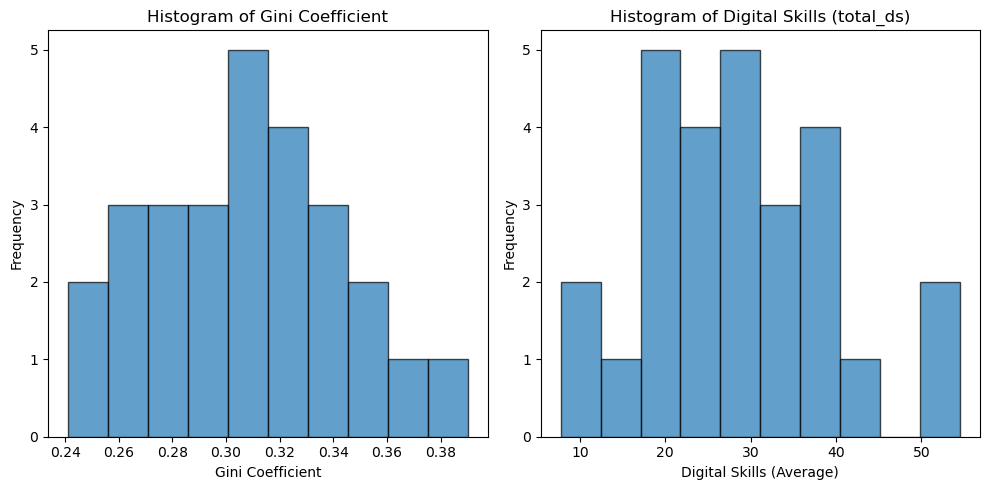

In [34]:

# Assuming df_gini_corr is your DataFrame
plt.figure(figsize=(10,5))

# Histogram for Gini coefficient
plt.subplot(1, 2, 1)
plt.hist(df_gini_corr['Gini coefficient'], bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Gini Coefficient')
plt.xlabel('Gini Coefficient')
plt.ylabel('Frequency')

# Histogram for Digital Skills (total_ds)
plt.subplot(1, 2, 2)
plt.hist(df_gini_corr['total_ds'], bins=10, alpha=0.7, edgecolor='black')
plt.title('Histogram of Digital Skills (total_ds)')
plt.xlabel('Digital Skills (Average)')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

looks like normal distributions, but let's test it, too!

there are also tests for normality - e.g. shapiro wilk test

In [35]:
stats.shapiro(df_gini_corr['Gini coefficient'], axis=None, nan_policy='propagate', keepdims=False)

ShapiroResult(statistic=0.9860809059405684, pvalue=0.9667848177739623)

= normally distributed.

In [36]:
stats.shapiro(df_gini_corr['total_ds'], axis=None, nan_policy='propagate', keepdims=False)

ShapiroResult(statistic=0.9703181198211126, pvalue=0.6102374947482272)

= both datasets are normally distributed.

(Interpretation if Shapiro Wilk results: p-value has to be NOT significant to indicate a normal distribution!)

### Pearson correlation calculation because of normal distribution:

In [37]:

# Assuming df_gini_corr is your DataFrame, and 'Gini coefficient' and 'total_ds' are your column names
correlation, p_value = pearsonr(df_gini_corr['Gini coefficient'], df_gini_corr['total_ds'])

print(f"Pearson correlation: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation: -0.4026873127240082
P-value: 0.03729569433521863


#### --> moderate significant negative correlation of -0.4.

### Checking complete correlation table for all numeric values:

In [38]:
correlation_matrix = df_gini_corr.corr(numeric_only=True)
print(correlation_matrix)

                           Year  Gini coefficient  skill_level_5_f_total  \
Year                   1.000000         -0.062795               0.083029   
Gini coefficient      -0.062795          1.000000              -0.368185   
skill_level_5_f_total  0.083029         -0.368185               1.000000   
skill_level_5_m_total  0.079143         -0.422143               0.937406   
total_ds               0.082296         -0.402687               0.982801   

                       skill_level_5_m_total  total_ds  
Year                                0.079143  0.082296  
Gini coefficient                   -0.422143 -0.402687  
skill_level_5_f_total               0.937406  0.982801  
skill_level_5_m_total               1.000000  0.985592  
total_ds                            0.985592  1.000000  


### Creating a heatmap for a better visualization:

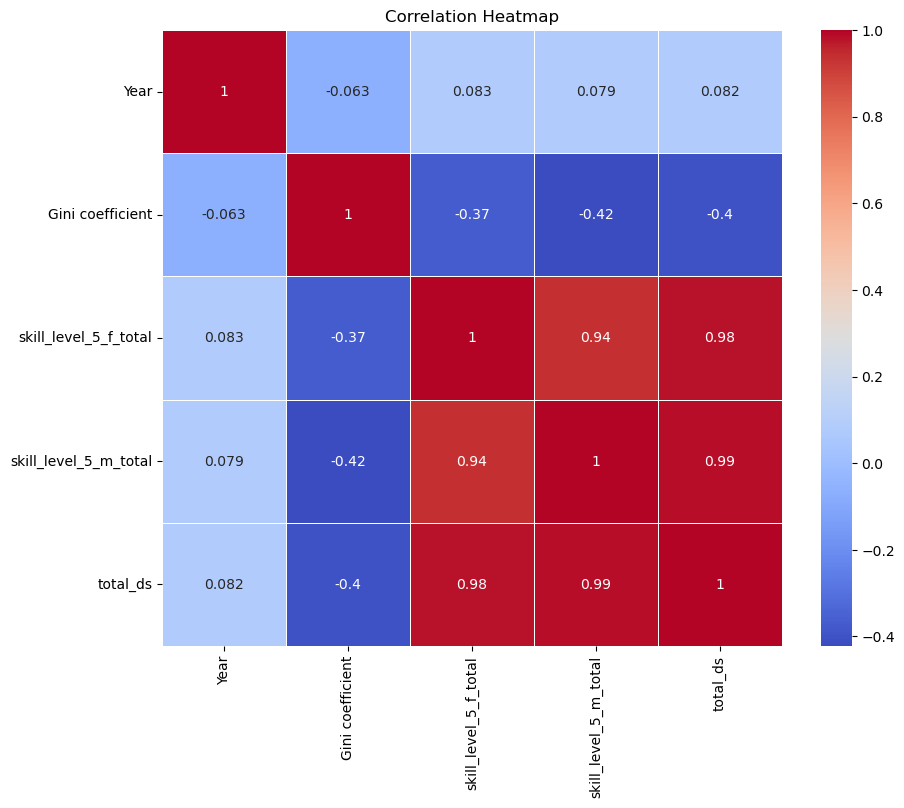

In [39]:
# Set the plot size for better visibility
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

# Summary

Our Statistical tests confirm that there is a moderate negative relationship between income inequality and advanced digital skills with a significant correlation of -0.40. It’s not a perfect correlation, but it’s significant enough to suggest that income inequality is a relevant factor in digital skill development.

To sum up, our analysis shows that countries with lower income inequality tend to have a higher proportion of individuals with advanced digital skills.
